### Importação dos dados



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [6]:
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#1. Análise do faturamento


In [55]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

faturamento_por_loja = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

faturamento_por_loja = pd.Series(faturamento_por_loja).sort_values(ascending=False)

print(faturamento_por_loja)

Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
dtype: float64


/tmp/ipython-input-54-1866926235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_por_loja.index, y=faturamento_por_loja.values, palette='coolwarm')


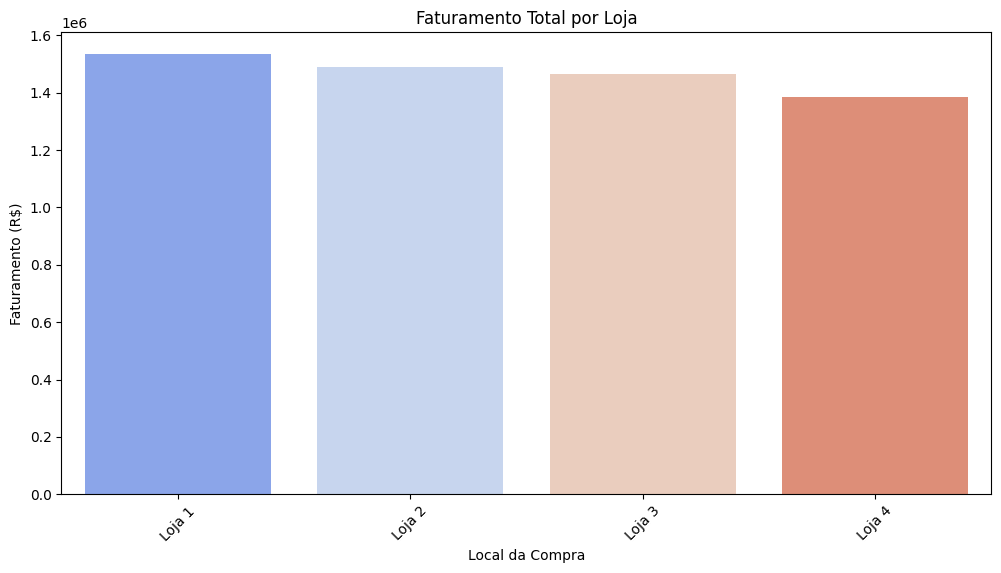

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=faturamento_por_loja.index, y=faturamento_por_loja.values, palette='coolwarm')
plt.title('Faturamento Total por Loja')
plt.xlabel('Local da Compra')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.show()

# 2. Vendas por Categoria


In [ ]:
vendas_por_categoria = df.groupby('Categoria do Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

print(vendas_por_categoria)

Categoria do Produto
moveis                   5511
eletronicos              5229
brinquedos               3606
eletrodomesticos         3434
esporte e lazer          3175
instrumentos musicais    2312
livros                   2239
utilidades domesticas    2114
Name: Quantidade de parcelas, dtype: int64


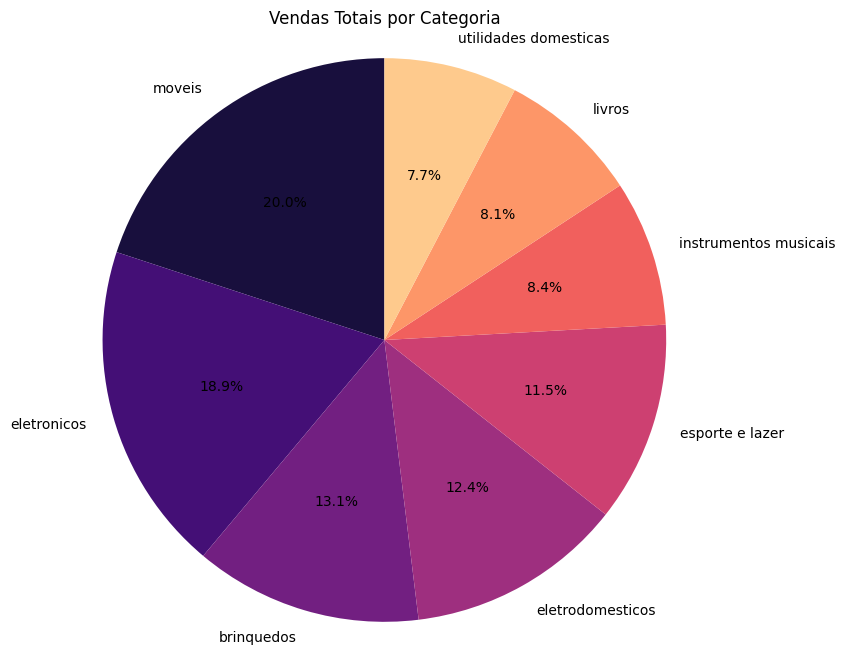

In [12]:
vendas_por_categoria = df.groupby('Categoria do Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(vendas_por_categoria.values, labels=vendas_por_categoria.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('magma', len(vendas_por_categoria)))
plt.title('Vendas Totais por Categoria')
plt.axis('equal')
plt.show()

O Código abaixo foi feito para entender as vendas por catégoria além das vendas individuais, já que a expectativa é avaliar as lojas

Faturamento por Categoria - Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Faturamento por Categoria - Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Faturamento por Categoria - Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
m

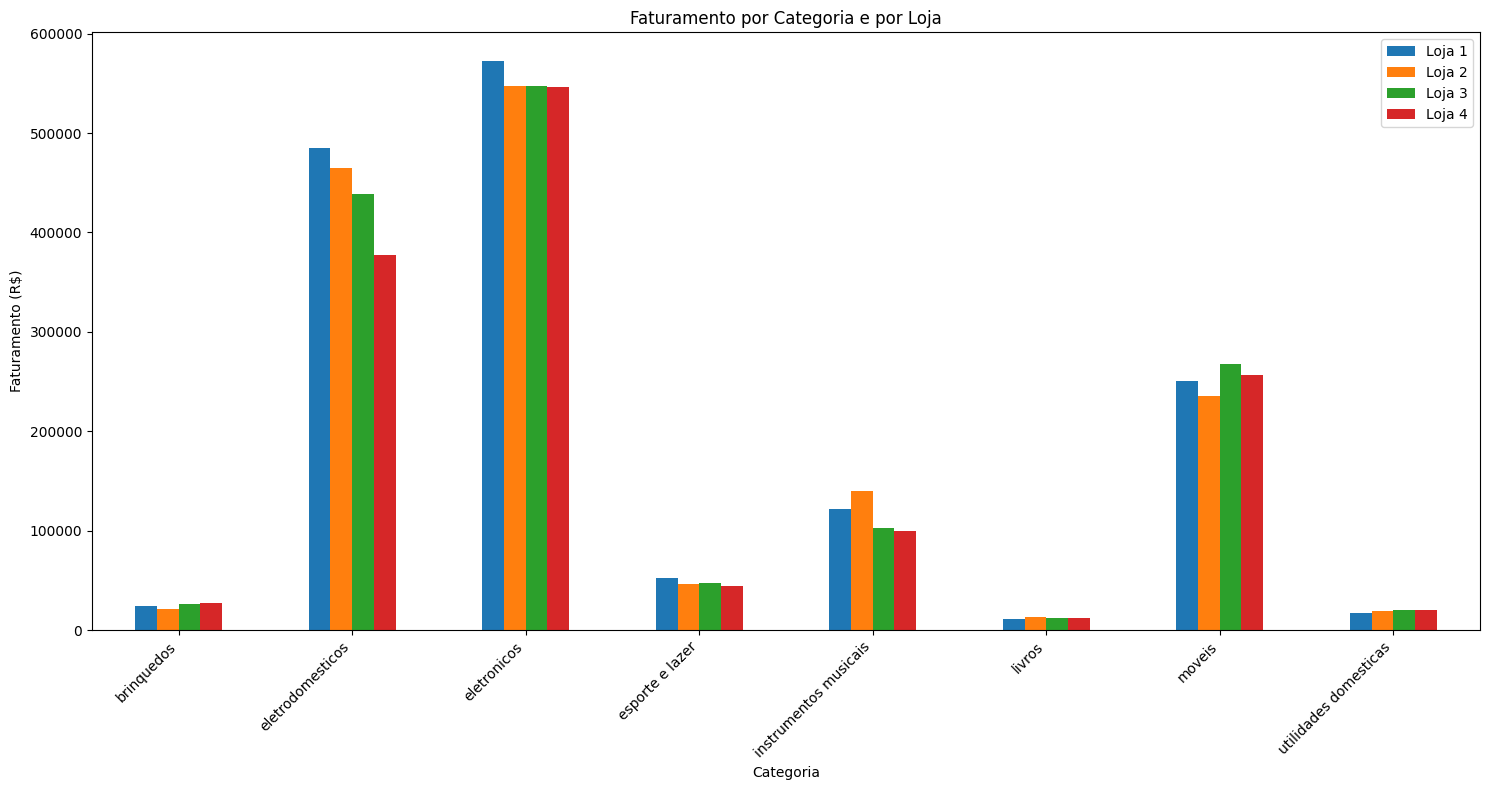

In [69]:
faturamento_p_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].sum()
faturamento_p_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum()
faturamento_p_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum()
faturamento_p_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum()

print("Faturamento por Categoria - Loja 1:")
print(faturamento_p_categoria_loja1)
print("\nFaturamento por Categoria - Loja 2:")
print(faturamento_p_categoria_loja2)
print("\nFaturamento por Categoria - Loja 3:")
print(faturamento_p_categoria_loja3)
print("\nFaturamento por Categoria - Loja 4:")
print(faturamento_p_categoria_loja4)

faturamento_df = pd.DataFrame(faturamento_p_categoria)

faturamento_df.plot(kind='bar', figsize=(15, 8))
plt.title('Faturamento por Categoria e por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [46]:
média_avaliação_loja1 = pd.to_numeric(loja['Avaliação da compra'], errors='coerce').mean()
média_avaliação_loja2 = pd.to_numeric(loja2['Avaliação da compra'], errors='coerce').mean()
média_avaliação_loja3 = pd.to_numeric(loja3['Avaliação da compra'], errors='coerce').mean()
média_avaliação_loja4 = pd.to_numeric(loja4['Avaliação da compra'], errors='coerce').mean()

print(f"média de avaliação Loja 1: {média_avaliação_loja1:.2f}")
print(f"média de avaliação for Loja 2: {média_avaliação_loja2:.2f}")
print(f"média de avaliação for Loja 3: {média_avaliação_loja3:.2f}")
print(f"média de avaliação for Loja 4: {média_avaliação_loja4:.2f}")

média de avaliação Loja 1: 3.98
média de avaliação for Loja 2: 4.04
média de avaliação for Loja 3: 4.05
média de avaliação for Loja 4: 4.00


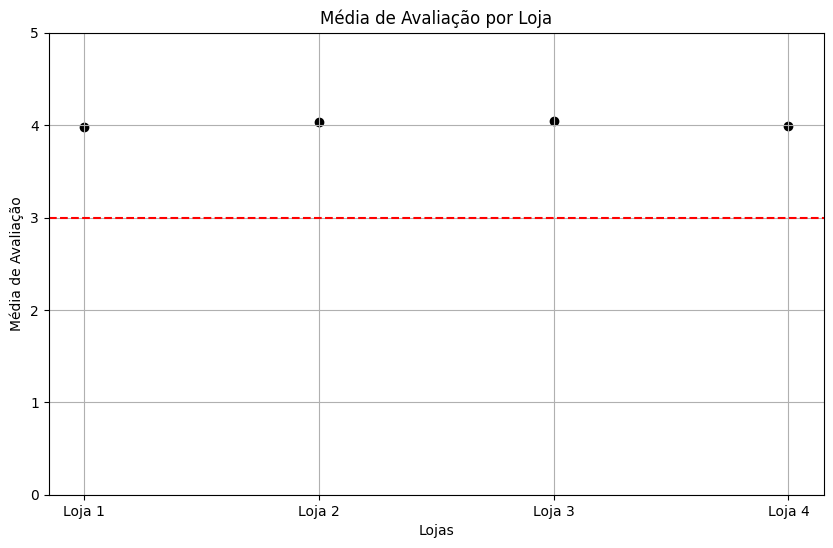

In [50]:
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias_avaliacao = [média_avaliação_loja1, média_avaliação_loja2, média_avaliação_loja3, média_avaliação_loja4]

plt.figure(figsize=(10, 6))
plt.scatter(nomes_lojas, medias_avaliacao, color='black')

plt.title('Média de Avaliação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.axhline(y=3, color='r', linestyle='--')
plt.grid()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [16]:

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

produtos_vendidos = lojas.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()

produtos_vendidos = produtos_vendidos.sort_values(by='Quantidade de parcelas', ascending=False)

produtos_mais_vendidos = produtos_vendidos.head(10)

produtos_menos_vendidos = produtos_vendidos.tail(10)

print("Produtos Mais Vendidos:")
print(produtos_mais_vendidos)

print("\nProdutos Menos Vendidos:")
print(produtos_menos_vendidos)


Produtos Mais Vendidos:
               Produto  Quantidade de parcelas
43  Secadora de roupas                     649
17              Cômoda                     627
40            Pandeiro                     625
2            Bicicleta                     614
12    Celular Plus X42                     611
9            Cama king                     603
30     Jogo de panelas                     601
37         Micro-ondas                     600
1              Bateria                     595
49              Violão                     595

Produtos Menos Vendidos:
            Produto  Quantidade de parcelas
25         Guitarra                     497
48      Tablet ABXY                     497
16  Cubo mágico 8x8                     487
6       Boneca bebê                     474
38          Mochila                     471
35   Mesa de centro                     469
19   Dinossauro Rex                     458
11     Celular ABXY                     447
29    Jogo de copos                  

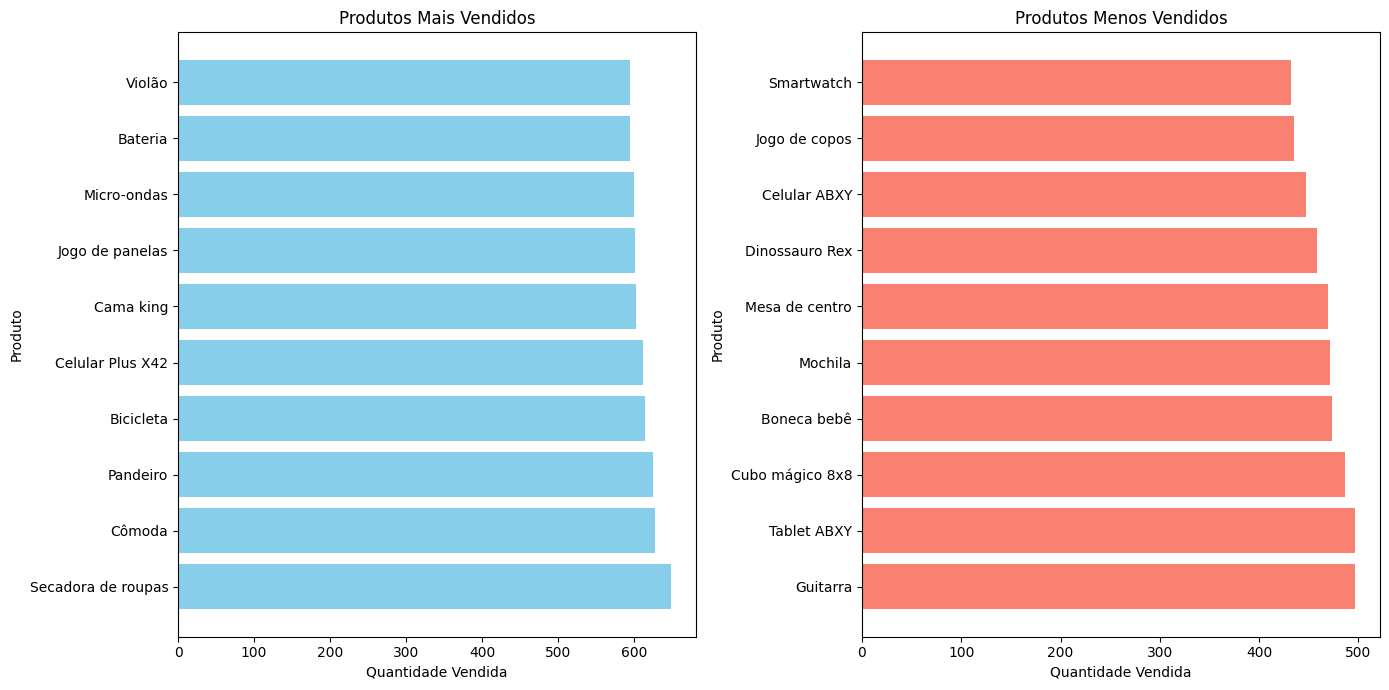

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.barh(produtos_mais_vendidos['Produto'], produtos_mais_vendidos['Quantidade de parcelas'], color='skyblue')
plt.title('Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')

plt.subplot(1, 2, 2)
plt.barh(produtos_menos_vendidos['Produto'], produtos_menos_vendidos['Quantidade de parcelas'], color='salmon')
plt.title('Produtos Menos Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')

plt.tight_layout()
plt.show()

O código abaixo foi feito para entender o impacto de venda de cada produto em relação ao preço

In [18]:

lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

produtos_vendidos = (
    lojas.groupby('Produto')
    .agg({'Quantidade de parcelas': 'sum', 'Preço': 'mean'})
    .reset_index())

produtos_vendidos['Receita Total'] = produtos_vendidos['Quantidade de parcelas'] * produtos_vendidos['Preço']

produtos_vendidos = produtos_vendidos.sort_values(by='Quantidade de parcelas', ascending=False)

produtos_mais_vendidos = produtos_vendidos.head(10)

produtos_menos_vendidos = produtos_vendidos.tail(10)

print("Produtos Mais Vendidos:")
print(produtos_mais_vendidos[['Produto', 'Quantidade de parcelas', 'Preço', 'Receita Total']])

print("\nProdutos Menos Vendidos:")
print(produtos_menos_vendidos[['Produto', 'Quantidade de parcelas', 'Preço', 'Receita Total']])

Produtos Mais Vendidos:
               Produto  Quantidade de parcelas        Preço  Receita Total
43  Secadora de roupas                     649  1401.586550   9.096297e+05
17              Cômoda                     627   370.915857   2.325642e+05
40            Pandeiro                     625    85.709239   5.356827e+04
2            Bicicleta                     614   656.368827   4.030105e+05
12    Celular Plus X42                     611  2700.682525   1.650117e+06
9            Cama king                     603   900.698308   5.431211e+05
30     Jogo de panelas                     601   203.376700   1.222294e+05
37         Micro-ondas                     600   748.870097   4.493221e+05
1              Bateria                     595   970.810099   5.776320e+05
49              Violão                     595   417.716117   2.485411e+05

Produtos Menos Vendidos:
            Produto  Quantidade de parcelas        Preço  Receita Total
25         Guitarra                     497  1045.696

# 5. Frete Médio por Loja


In [31]:
frete_medio_loja1 = loja1['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print("Frete Médio da Loja 1:", frete_medio_loja1)
print("Frete Médio da Loja 2:", frete_medio_loja2)
print("Frete Médio da Loja 3:", frete_medio_loja3)
print("Frete Médio da Loja 4:", frete_medio_loja4)



Frete Médio da Loja 1: 34.69180491551149
Frete Médio da Loja 2: 33.62194065817927
Frete Médio da Loja 3: 33.07446427411743
Frete Médio da Loja 4: 31.278997081841727


/tmp/ipython-input-68-3988827732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nomes_lojas, y=fretes_medios, palette='viridis')


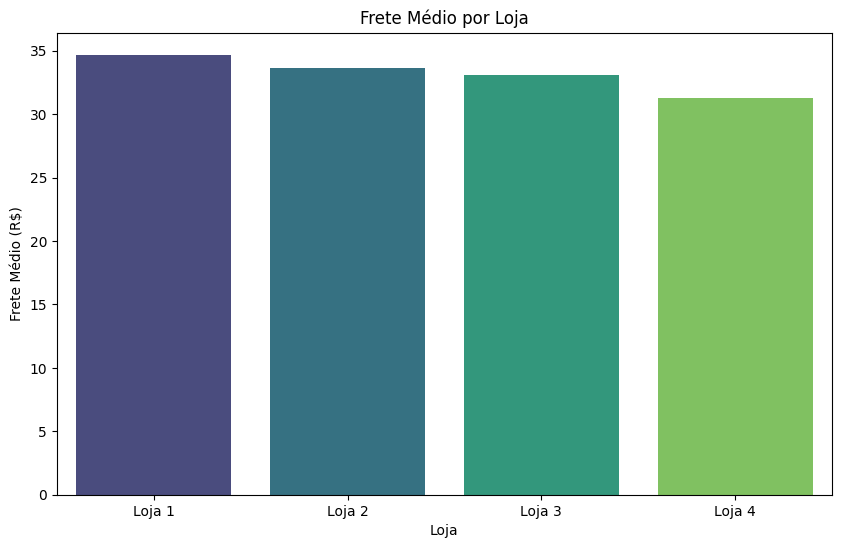

In [68]:
fretes_medios = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

plt.figure(figsize=(10, 6))
sns.barplot(x=nomes_lojas, y=fretes_medios, palette='viridis')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.show()

A loja 1 é a loja com menor avaliação e que tem o maior frete, porém é a loja com o maior faturamento e também é a loja que mais vende em 3 categorias distintas, sendo uma delas os eletrônicos que possuém o maior preço e os eletrodomestrico que tem as maiores vendas de produtos.                         Já a loja 4 por mais que tenha o menor frete de todos, é a loja com o menor faturamento, não tem bom desempenho dentro dos eletronomesticos que é a segunda maior catergoria, também não tem uma avaliação tão boa como a loja 2 e 3. Por isso **eu recomendaria a venda da loja 4**.